## EDA: Listas de usuarios
####
##### A continuación importamos las librerías que utilizaremos para el análisis.

In [3]:
import pandas as pd
import requests
import numpy as np
import json
from bs4 import BeautifulSoup as bs
import random
import time
import os
import json
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos

##### Abrimos un archivo pickle que contiene las listas de reviews de una parte de los usuarios de MAL.

In [4]:
with open(os.path.join("data", "users_df.pickle"), "rb") as archivo:
    users_df = pickle.load(archivo)

##### Al tener un conjunto de datos grandes con muchos valores nulos, para poder ahorrar memoria realizamos una conversión del DataFrame 'gran_df' a 'gran_df_sparse' utilizando el tipo de datos dispersos de Pandas. Aprovechando así la capacidad de los tipos de datos dispersos para manejar eficientemente este conjunto.
####
####

In [5]:
users_df

,39110:xxbladexx20,216949:haijuta,246587:d3athzero,107198:JayJay1401,45036:Seleare,4328:Joseph_,110895:Rudenick,93256:Moltke,160129:dander,256598:melandrea,...,16805797:iambabymango,16809902:Flopoflop,16791488:RhaenyraFR,16838607:SasOnator,17063891:Dezwhite05,17197026:dumb_zoro_,16617450:kotyboh,16459755:Tiberjuice,16965619:Watcher794_2,16656371:Aoto_uchiha10
24,10.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,8.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,9.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### A continuación creamos un histograma con los valores del DataFrame 'gran_df_sparse' con el objetivo de visualizar como se distribuyen las calificaciones e intentar identificar patrones o tendencias.

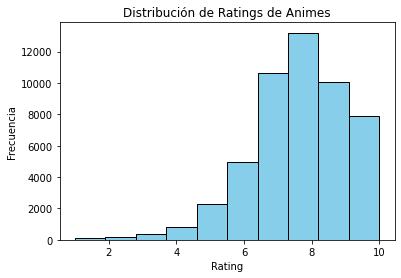

In [472]:
plt.hist(gran_df_sparse.values.flatten(), bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Ratings de Animes')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

In [473]:
# Obtenemos un DataFrame unidimensional con el número visualizaciones por anime
visualizaciones_anime = gran_df_sparse.notnull().sum(axis=1)

In [474]:
print(f'Máximas visualizaciones de un anime:', visualizaciones_anime.max())
print(f'Mínimas visualizaciones de un anime:', visualizaciones_anime.min())

Máximas visualizaciones de un anime: 303
Mínimas visualizaciones de un anime: 1


In [475]:
# Obtenemos un DataFrame unidimensional con el promedio de calificaciones por anime
promedio_calificaciones = gran_df_sparse.mean(axis=1, skipna=True)
print(f'Máximo promedio de calificaciones de un anime:', promedio_calificaciones.max())
print(f'Mínimo promedio de calificaciones de un anime:', promedio_calificaciones.min())

Máximo promedio de calificaciones de un anime: 10.0
Mínimo promedio de calificaciones de un anime: 1.0


In [476]:
# Obtenemos un DataFrame unidimensional con la desviación estándar de calificaciones de cada anime
dispersion_calificaciones = gran_df_sparse.sparse.to_dense().std(axis=1, skipna=True)
print(f'Máximo nivel de dispersión de calificaciones de un anime:', dispersion_calificaciones.max())
print(f'Mínimo nivel de dispersión de calificaciones de un anime:', dispersion_calificaciones.min())


Máximo nivel de dispersión de calificaciones de un anime: 6.363961030678928
Mínimo nivel de dispersión de calificaciones de un anime: 0.0


In [487]:
# Teniendo los máximos y minimos de cada medida, podemos establecer un rango para la posterior
# segmentación del conjunto de datos
rango_visualizaciones_anime = [1, 50, 100, 150, 303]
rango_promedio_calificaciones = [1, 5, 7, 10]
rango_dispersion_calificaciones = [0, 2, 4, 6.5]

In [488]:
segmentos_df = pd.DataFrame(index=gran_df_sparse.index)  

# Creamos columnas de segmentación
gran_df_sparse['Nivel_Popularidad'] = pd.cut(visualizaciones_anime, bins=rango_visualizaciones_anime, labels=['Poco', 'Moderado', 'Bastante', 'Mucho'])
gran_df_sparse['Nivel_Prom_Calificaciones'] = pd.cut(promedio_calificaciones, bins=rango_promedio_calificaciones, labels=['Bajo', 'Medio', 'Alto'])
gran_df_sparse['Nivel_Dispersion_Calificaciones'] = pd.cut(dispersion_calificaciones, bins=rango_dispersion_calificaciones, labels=['Baja', 'Media', 'Alta'])


In [489]:
gran_df_sparse = pd.concat([gran_df_sparse, segmentos_df], axis=1)

In [490]:
gran_df_sparse[['Nivel_Popularidad', 'Nivel_Prom_Calificaciones', 'Nivel_Dispersion_Calificaciones']].head()

,Nivel_Popularidad,Nivel_Prom_Calificaciones,Nivel_Dispersion_Calificaciones
30,Bastante,Alto,Baja
47,Moderado,Alto,Baja
71,Poco,Alto,Baja
72,Poco,Alto,Baja
170,Poco,Alto,Baja


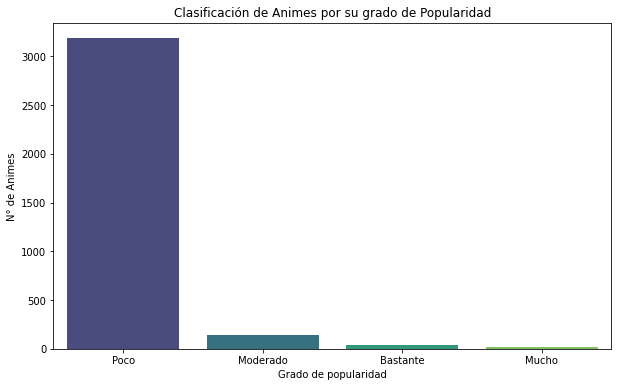

In [492]:
# Gráfico de barras para clasificar los animes en base a su popularidad
plt.figure(figsize=(10, 6))
sns.countplot(x='Nivel_Popularidad', data=gran_df_sparse, palette='viridis')
plt.title('Clasificación de Animes por su grado de Popularidad')
plt.xlabel('Grado de popularidad')
plt.ylabel('N° de Animes')
plt.show()

Esta gráfica muestra como la mayor parte de los animes de la muestra tomada de MAL tienen poca visualización, y solo una ínfima parte posee un grado de popularidad alto, sin embargo, cabe aclarar que cuando el gráfico se refiere a grado de popularidad, esta popularidad hace referencia a la 'fama' o la visualización de un anime, no se basa en conjunto con las calificaciones de cada usuario.
####
####

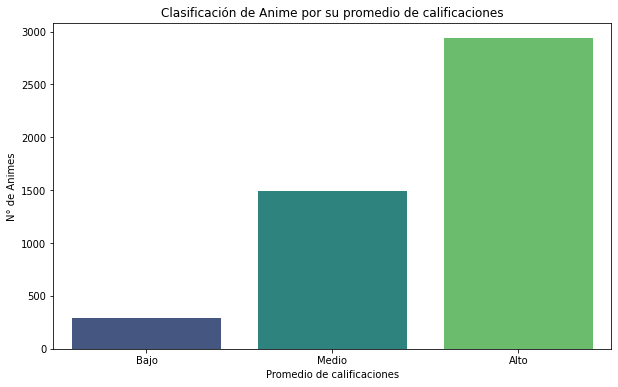

In [495]:
# Gráfico de barras para clasificar los animes en base a su grado de calificaciones
plt.figure(figsize=(10, 6))
sns.countplot(x='Nivel_Prom_Calificaciones', data=gran_df_sparse, palette='viridis')
plt.title('Clasificación de Anime por su promedio de calificaciones')
plt.xlabel('Promedio de calificaciones')
plt.ylabel('N° de Animes')
plt.show()

En un primer vistazo, podría parecer que esta gráfica carece de coherencia. ¿Cómo es posible que tantos animes obtengan calificaciones tan elevadas cuando la gráfica anterior indicaba que muy pocos eran visualizados por los usuarios? No obstante, debemos tener en cuenta que esta gráfica se basa exclusivamente en las calificaciones otorgadas por los usuarios a cada anime. Una parte significativa de ese extenso conjunto de animes con baja popularidad en la gráfica anterior puede trasladarse al grupo de aquellos con un alto promedio de calificaciones. Esto se debe a que, al tener menos revisiones, cada una de estas puede provocar un cambio significativo en el promedio de calificaciones del anime.
####
####

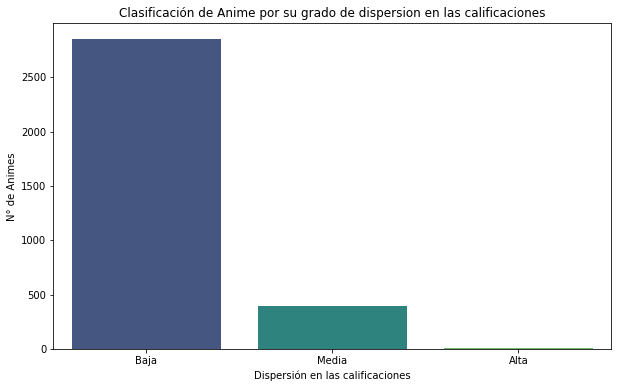

In [498]:
# Gráfico de barras para clasificar los animes en base a su grado de calificaciones
plt.figure(figsize=(10, 6))
sns.countplot(x='Nivel_Dispersion_Calificaciones', data=gran_df_sparse, palette='viridis')
plt.title('Clasificación de Anime por su grado de dispersion en las calificaciones')
plt.xlabel('Dispersión en las calificaciones')
plt.ylabel('N° de Animes')
plt.show()

Este gráfico, al mostrar que la mayoría de los animes tienen un bajo grado de dispersión en torno a sus calificaciones, sugiere una consistencia en las evaluaciones. Esto implica que los espectadores tienden a estar de acuerdo en sus opiniones sobre estos animes. Además, la baja dispersión indica una menor polarización entre los usuarios, lo que significa que hay menos variabilidad en las opiniones de la audiencia. Esta uniformidad podría deberse a que la audiencia comparte opiniones más similares sobre estos animes en comparación con otros que podrían generar opiniones más polarizadas.

Sin embargo, es importante señalar que es inusual observar una baja dispersión al mismo tiempo que hay una baja cantidad de calificaciones por anime, sin que esto afecte la dispersión. Este fenómeno podría atribuirse a varios factores, como la falta de diversidad en la audiencia o un sesgo en la misma. Es decir, la audiencia podría tener preferencias similares o específicas que resultan en calificaciones más consistentes.
####
####